In [13]:
import random
import math
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import partial
import statistics
plt.style.use('ggplot')



In [2]:
def rw2(n):# this gives samples from weibull(5,2)# put n=10000,the shape 5 and the scale 2
    x,y=0,0
    distance=[]
    for i in range(1,n+1):
            r=random.weibullvariate(alpha,beta) # step size r
            theta=2.*math.pi*random.random()
            x +=r*math.cos(theta)
            y +=r*math.sin(theta)
            distance.append(r)# save the distances r for the mcmc sampler
    return(np.array(distance))# depending what do you want to do, either save the pairs, or save the distances r  between points
    #return(x,y)
    
alpha=2#float(input("what's the scale?"))
beta=5#float(input("what's the shape?"))
n=10000#int(input("how many steps?"))
#tries=int(input("how many tries?"))#  put tries=1  in order to properly save the list distance
data = rw2(n)# very important because you need the same data, if you put rw2(n) in there you change the data every time
#for i in range(tries):
    #print (rw2(n))


In [4]:
# calculate the log likelihood of weibull(a,b)
import scipy.stats 
from scipy.stats import dweibull
def log_likelihood(x,a,b):# a is shape, b is scale
     return sum(dweibull.logpdf(x,scale=b,c=a))
    

In [5]:
#%%timeit
import scipy.stats as stats
import numpy as np
#n=10000 #number of observations in a sample 
# initial guess for theta(a and b) as array.
guess = [5.0,2.0]
# Prepare storing MCMC chain as array of arrays.
A = [guess]
# define stepsize of MCMC.
stepsizes = [0.01,0.01]  # array of stepsizes
accepted  = 0.0
old_theta=guess# define initial values for theta 
old_loglik = log_likelihood(data,old_theta[0],old_theta[1])#calculate the first log likelihood
# Metropolis-Hastings with 10,000 iterations.
for p in range(10000):
    #old_theta  = A[len(A)-1]   old parameter value as array(not that elegant way)
    # Suggest new candidate from Gaussian proposal distribution.
    #new_theta = np.zeros([len(old_theta)])
    new_theta = old_theta + stats.norm(0, stepsizes).rvs() 
    #add the restraints on new_theta
    if new_theta[0]<0 or new_theta[1]<0: 
        continue
    new_loglik = log_likelihood(data,new_theta[0],new_theta[1])
    # Accept new candidate in Monte-Carlo fashing.
    if (new_loglik > old_loglik):
        A.append(new_theta)
        accepted = accepted + 1.0  # monitor acceptance
        old_loglik=new_loglik
        old_theta=new_theta
    else:
        u = random.uniform(0.0,1.0)
        if (u < math.exp(new_loglik - old_loglik)):
            A.append(new_theta)
            accepted = accepted + 1.0  # monitor acceptance
            old_loglik=new_loglik
            old_theta=new_theta
        else:
            A.append(old_theta)
print("Acceptance rate = "+str(accepted/10000.0))
#print(A)



Acceptance rate = 0.4189


In [ ]:
old_theta=guess# define initial values for theta  # don't run this box!
old_loglik = log_likelihood(rw2(n),old_theta[0],old_theta[1])#calculate the first log likelihood, put data instead of rw2(n)!

In [5]:
# I believe the two methods are the same # Don't run this box!
import scipy.stats as stats 
old_theta=[2,5]
stepsizes=[0.005,0.005]
new_theta=np.zeros(2)
new_theta[0] = random.gauss(old_theta[0], stepsizes[0])
new_theta[1] = random.gauss(old_theta[1], stepsizes[1])
print(new_theta)
#?random.gauss
sigma=0.3
theta_p = old_theta + stats.norm(0, sigma).rvs() 
print(theta_p)
stats.norm(0, sigma).rvs() 
#?stats.norm
#newest_theta=random.gauss(old_theta,stepsizes)doesn't work
#newest_theta
newest_theta=stats.norm(old_theta,sigma).rvs()
print(newest_theta)

[ 2.00393306  4.99530383]
[ 1.42708323  4.42708323]
[ 2.09013979  4.68626925]


In [6]:
#%%timeit
# save the posterior for a, that is shape
a=[]
for i in range(len(A)-1):
    a.append(A[i-1][0])
#print(a,end='')   
statistics.mean(a)   

4.9557953237324011

In [7]:

# save the posterior for b,that is scale
b=[]
for i in range(len(A)-1):
    b.append(A[i-1][1])
#print(b,end='') 
statistics.mean(b)

1.9956263450063711

In [ ]:
okay_theta = old_theta + stats.norm(0, stepsizes).rvs() 
okay_theta

Text(0.5,0,'Shape Parameter')

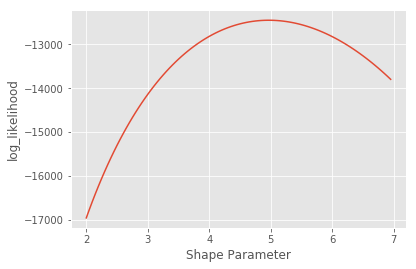

In [14]:

loglike = np.zeros(100)
xval = np.zeros(100)

for i in range(100):
    xval[i]=2+i*0.05
    loglike[i] = log_likelihood(data,2+i*0.05,2)

plt.plot(xval,loglike)
plt.ylabel('log_likelihood')
plt.xlabel('Shape Parameter')



In [13]:
import matplotlib.pyplot as plt


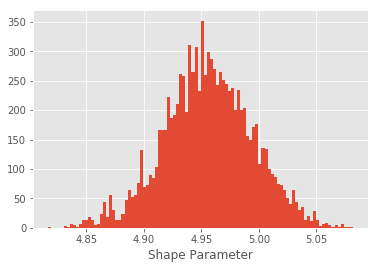

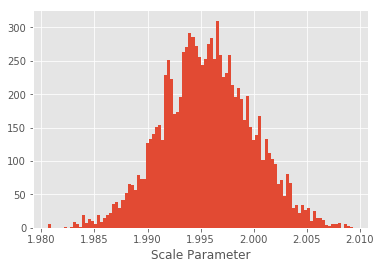

In [15]:
B=np.array(A)
plt.hist(B[:,0],bins=100)
plt.xlabel("Shape Parameter")
plt.show()
plt.hist(B[:,1],bins=100)
plt.xlabel("Scale Parameter")
plt.show()

Text(0.5,0,'Shape parameter')

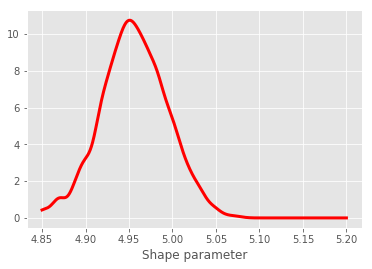

In [16]:
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
kernel1=gaussian_kde(B[:,0])
kernel2=gaussian_kde(B[:,1])
x=np.linspace(4.85,5.2,1000)
kernel1(x)
plt.plot(x,kernel1(x),'r-',linewidth=3)
plt.xlabel("Shape parameter")


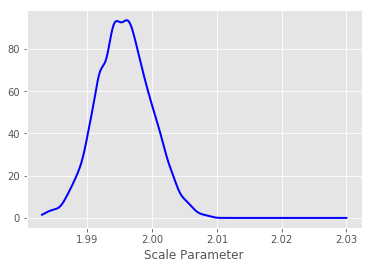

In [17]:
kernel2=gaussian_kde(B[:,1])
y=np.linspace(1.983,2.03,1000)
kernel2(y)
plt.plot(y,kernel2(y),'b-',linewidth=2)
plt.xlabel("Scale Parameter")
plt.show()


In [12]:
% time sum(range(9))

Wall time: 0 ns


36

In [14]:
?timeit
